# MAD4401 - Project 2

---

Consider the Initial Value Problem (IVP):
$$y'(t) = t^{-2}(\sin{2t}-2ty)\,\,\,\text{for}\,\,\,1\leq t \leq 2,$$

$$y(1) = 2.$$

This IVP has an exact solution
$$y(t)=\frac{1}{2}t^{-2}(4+\cos{2}-\cos{2t}).$$

---

## Problem 1

### Part (a) 

Approximate $y(t)$ using Euler's method with $h=\frac{1}{4}$ and complete the given table. 

In [1]:
"""
EulersMethod(f, a, b, N, α) - implementation of Euler's method 
for finding approximate solutions for initial value problems.
Arguments:
    - f := a function object representing first derivative
    - a := lower bound of interval 
    - b := upper bound of interval
    - N := number of mesh points (doesn't include initial point)
    - α := the initial value given (64-bit floating-point preffered)
"""
function EulersMethod(f, a, b, N, α)
    h = (b-a)/N    # step size 
    t = a    # set first mesh point to first point in interval 
    w = α    # set the initial value for w0
    vals = [w]    # vector to return approximations
    
    # compute approximations for remaining mesh points
    for i in 1:N
        w = w + h*f(t,w)    # compute w_i
        t = a + i*h    # compute t_i
        append!(vals, w)
    end 
    return vals
end;

In [2]:
# implementation of first derivative
function f(t,y)
    (t^-2)*(sin(2t)-2t*y)
end;

In [3]:
# compute approximations 
approximationsEM = EulersMethod(f, 1, 2, 4, 2.);

In [4]:
# vector containing approximations of y(t) with h = 1/4
approximationsEM

5-element Vector{Float64}:
 2.0
 1.2273243567064205
 0.8321501570804852
 0.5704467722825309
 0.37882661467612455

### Part (b)

Plot the approximation.

In [5]:
using Plots

In [6]:
# exact function 
function g(t)
    (1/2)*(t^-2)*(4+cos(2)-cos(2t))
end;

In [7]:
# compute exact values 
exactEM = g.(collect(1:.25:2));

In [8]:
# vector containing exact values
exactEM

5-element Vector{Float64}:
 2.0
 1.4031989692799334
 1.0164101466785118
 0.7380097715499842
 0.5296870980395587

<br>Below is the graph comparing the exact value to the approximated values.

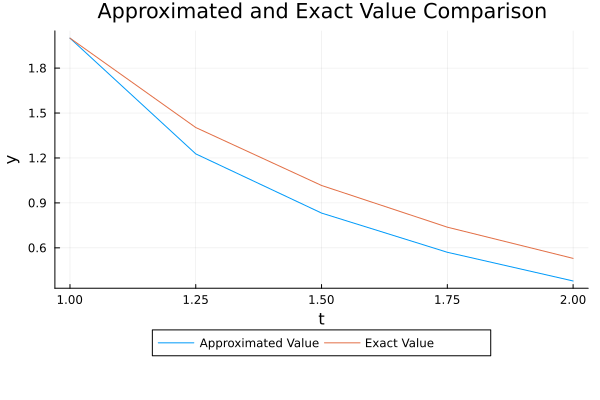

In [9]:
x = collect(1:.25:2)
y1 = approximationsEM
y2 = exactEM
plot(x,[approximationsEM,exactEM],label=["Approximated Value" "Exact Value"])
plot!(legend=:outerbottom, legendcolumns=2)
xlabel!("t")
ylabel!("y")
title!("Approximated and Exact Value Comparison")

### Part (c)

Approximate $y(t)$ using Euler's method with $h = \frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{1}{32}$ and complete the given table.

In [10]:
# compute exact values for given y(2)
exactValEM = g(2)

0.5296870980395587

In [11]:
# compute approximated values at each given N
approximationsN = [];
i = 2
while i <= 32
    vec = EulersMethod(f,1,2,i,2.)
    append!(approximationsN, vec[end]) # only take the last approximation
    i = i*2
end

In [12]:
# computed approximations at each N
approximationsN

5-element Vector{Any}:
 0.18290957292869525
 0.37882661467612455
 0.45878660562608714
 0.495261988720689
 0.5127188700310937

In [13]:
# compute errors
errorsN = []
for j in 1:5
    append!(errorsN,(abs.(approximationsN[j]-exactValEM)))
end

In [14]:
# vector of the computed errors
errorsN

5-element Vector{Any}:
 0.34677752511086346
 0.15086048336343416
 0.07090049241347157
 0.03442510931886972
 0.01696822800846498

### Part (d) 
Use the loglog in Matlab to plot and verity the error is converging at the rate O(h).
(Experimenting with Julia for this project, hopefully the log-log plot came out correctly)


In [15]:
using Plots

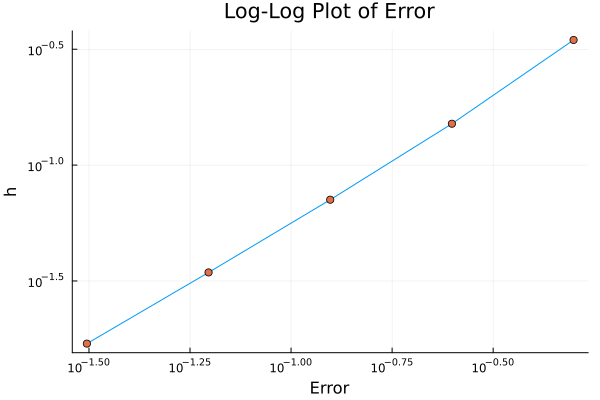

In [16]:
# generate a log-log plot of the errors
h = [0.5, 0.25, 0.125, 0.0625, 0.03125]
plot(h,errorsN) # plot h values against errors 
plot!(xscale=:log10, yscale=:log10, minorgrid=true) # change scaling
plot!(h, errorsN, seriestype=:scatter, legend=false)

# add plot attributes
xaxis!("Error")
yaxis!("h")
title!("Log-Log Plot of Error")

---

## Problem 2

### Part (a) 

Approximate $y(t)$ using the Runge-Kutta (order 4) method with $h = \frac{1}{4}$.

In [17]:
"""
RungeKutta4(f, a, b, N, α) - Implementation of Runge-Kutta method (order 4)
Arguments:
    - f := function object
    - a := lower bound of interval
    - b := upper bound of interval
    - N := number of mesh points
    - α := initial value (64-bit floating-point preffered)
"""
function RungeKutta4(f, a, b, N, α)
    h = (b-a)/ N
    t = a
    w = α
    vals = [w]   
    
    # compute approximations for remaining mesh points
    for i in 1:N
        k1 = h * f(t,w)
        k2 = h * f(t+(h/2), w + (k1/2))
        k3 = h * f(t+(h/2), w + (k2/2))
        k4 = h * f(t+h, w + k3)
        w = w + ((k1+2k2+2k3+k4)/6)
        append!(vals, w)    # add approximation to approximation vector
        t = a + i*h
    end
    return vals
end;

In [18]:
# vector of computed approximations using given parameters
approximationsRK = RungeKutta4(f, 1, 2, 4, 2.)

5-element Vector{Float64}:
 2.0
 1.403356615429061
 1.0165585859136061
 0.7381316836791276
 0.5297855647836995

### Part(b) 

Plot the approximations. 

In [19]:
# compute exact values for function
exactRK = g.(collect(1:.25:2));

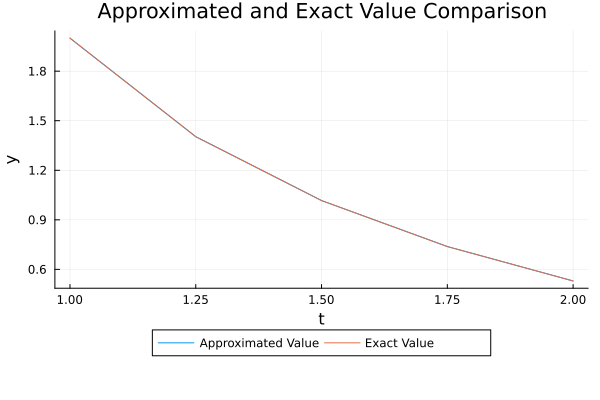

In [20]:
# generate graph of approximated vs. exact values
# they're REALLY close, can barely see them both
x = collect(1:.25:2)
y1 = approximationsRK
y2 = exactRK
plot(x,[approximationsRK,exactRK],label=["Approximated Value" "Exact Value"])
plot!(legend=:outerbottom, legendcolumns=2)
xlabel!("t")
ylabel!("y")
title!("Approximated and Exact Value Comparison")

### Part (c) 

Approximate $y(t)$ using the Runge-Kutta (order 4) method with the same values of $h$ as in problem 1.

In [21]:
# compute exact values for given y(2)
exactValRK = g(2)

0.5296870980395587

In [22]:
# compute approximated values at each given N
approximationsRKN = [];
i = 2
while i <= 32
    vec = RungeKutta4(f,1,2,i,2.)
    append!(approximationsRKN, vec[end]) # only take the last approximation
    i = i*2
end

In [23]:
# computed approximations at each N
approximationsRKN

5-element Vector{Any}:
 0.5315587749650665
 0.5297855647836995
 0.5296925824351879
 0.5296874192459855
 0.5296871174398682

In [24]:
# compute errors
errorsRKN = []
for j in 1:5
    append!(errorsRKN,(abs.(approximationsRKN[j]-exactValRK)))
end

In [25]:
# output computed absolute errors
errorsRKN

5-element Vector{Any}:
 0.0018716769255078258
 9.846674414082379e-5
 5.484395629196115e-6
 3.212064267898995e-7
 1.9400309470007926e-8

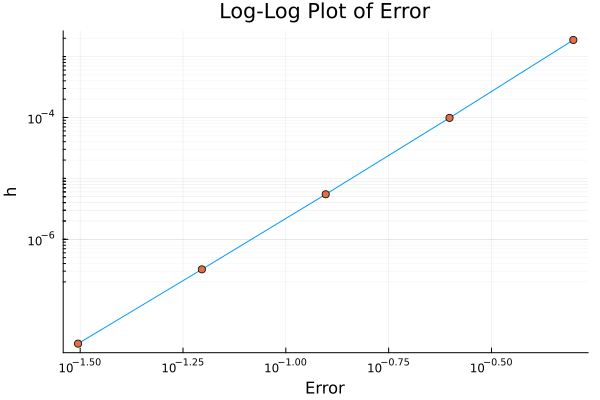

In [26]:
# generate a log-log plot of the errors
h = [0.5, 0.25, 0.125, 0.0625, 0.03125]
plot(h,errorsRKN)
plot!(xscale=:log10, yscale=:log10, minorgrid=true)
plot!(h, errorsRKN, seriestype=:scatter, legend=false)
xaxis!("Error")
yaxis!("h")
title!("Log-Log Plot of Error")